In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv(r"C:\Users\yassi\Downloads\deflators_tun.csv")
df.head()

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,#country+code,#date+start,#date+end,NaN,NaN,#country+name,#indicator+code,#indicator+name,NaN,NaN,NaN,#date+year,#indicator+type,#indicator+value+num,NaN
1,TUN,1970-01-01,1970-12-31,222.0,'788,Tunisia,22024,GDP Deflator,62250.0,"Value Standard Local Currency, 2015 prices",1970.0,1970,SLC,7.3798432152,X
2,TUN,1971-01-01,1971-12-31,222.0,'788,Tunisia,22024,GDP Deflator,62250.0,"Value Standard Local Currency, 2015 prices",1971.0,1971,SLC,7.8252687071,X
3,TUN,1972-01-01,1972-12-31,222.0,'788,Tunisia,22024,GDP Deflator,62250.0,"Value Standard Local Currency, 2015 prices",1972.0,1972,SLC,8.0508268388,X
4,TUN,1973-01-01,1973-12-31,222.0,'788,Tunisia,22024,GDP Deflator,62250.0,"Value Standard Local Currency, 2015 prices",1973.0,1973,SLC,8.7393144860,X


In [23]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Iso3             439 non-null    object 
 1   StartDate        439 non-null    object 
 2   EndDate          439 non-null    object 
 3   Area Code        438 non-null    float64
 4   Area Code (M49)  438 non-null    object 
 5   Area             439 non-null    object 
 6   Item Code        439 non-null    object 
 7   Item             439 non-null    object 
 8   Element Code     438 non-null    float64
 9   Element          438 non-null    object 
 10  Year Code        438 non-null    float64
 11  Year             439 non-null    object 
 12  Unit             439 non-null    object 
 13  Value            439 non-null    object 
 14  Flag             438 non-null    object 
dtypes: float64(3), object(12)
memory usage: 51.6+ KB


,Area Code,Element Code,Year Code
count,438.0,438.000000,438.000000
mean,222.0,34214.500000,1996.876712
std,0.0,28067.558901,15.823349
min,222.0,6179.000000,1970.000000
25%,222.0,6179.000000,1983.000000
50%,222.0,34214.500000,1997.000000
75%,222.0,62250.000000,2010.750000
max,222.0,62250.000000,2024.000000


In [29]:
df = df.iloc[1:].reset_index(drop=True)

In [31]:
df["Year"] = df["Year"].astype(int)

In [33]:
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

C:\Users\yassi\AppData\Local\Temp\ipykernel_18548\3665828480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deflator["Value"] = pd.to_numeric(df_deflator["Value"], errors="coerce")


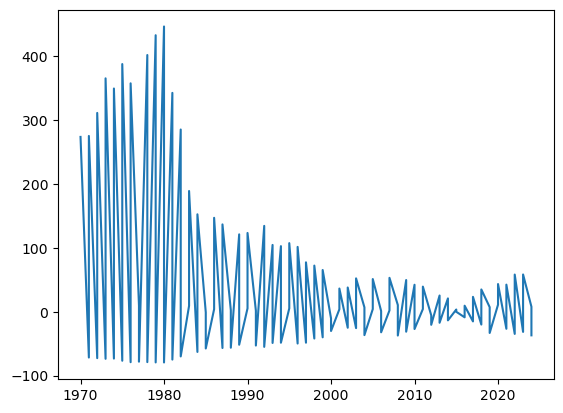

In [41]:
df["Item"].unique()
df_deflator = df[df["Item"] == "GDP Deflator"] 
df_deflator["Value"] = pd.to_numeric(df_deflator["Value"], errors="coerce")
df_deflator = df_deflator.sort_values("Year")
df_deflator["YoY"] = df_deflator["Value"].pct_change() * 100
plt.plot(df_deflator["Year"], df_deflator["YoY"])

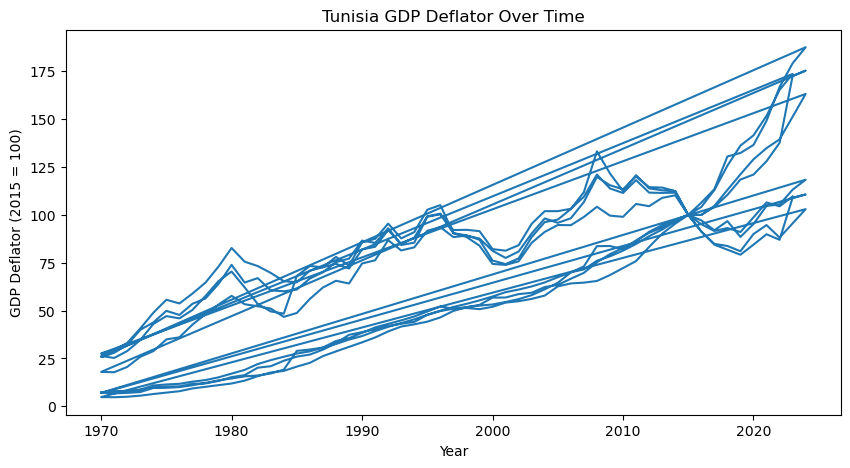

In [35]:
plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["Value"])
plt.xlabel("Year")
plt.ylabel("GDP Deflator (2015 = 100)")
plt.title("Tunisia GDP Deflator Over Time")
plt.show()

In [37]:
df["YoY_inflation"] = df["Value"].pct_change() * 100

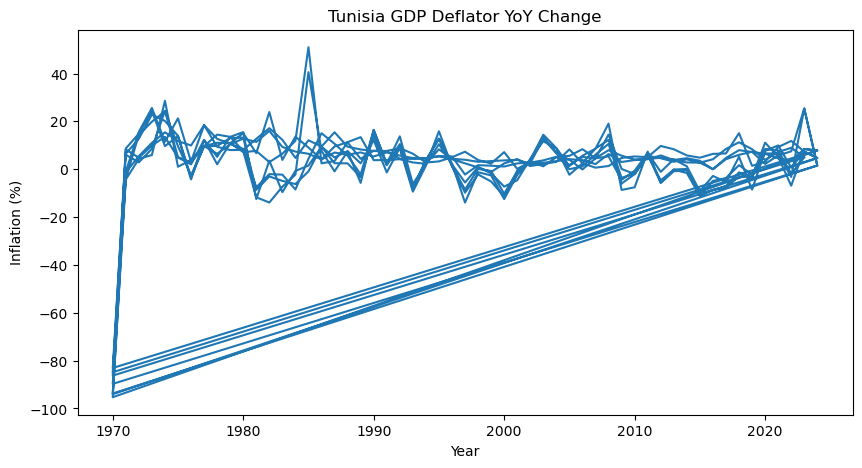

In [39]:
plt.figure(figsize=(10,5))
plt.plot(df["Year"], df_deflator["YoY"])
plt.xlabel("Year")
plt.ylabel("Inflation (%)")
plt.title("Tunisia GDP Deflator YoY Change")
plt.show()